C:\Users\ck261\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Latitude,Longitude,Release of substance,Alberta,Manitoba,British Columbia,Saskatchewan,Ontario,New Brunswick,Nova Scotia,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Incident Number,,,,,,,,,,,,,,,,,,,,,
INC2008-001,49.731350,-101.235570,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
INC2008-004,49.731350,-101.235570,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
INC2008-008,58.012000,-122.694333,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
INC2008-009,56.143770,-120.516050,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
INC2008-016,51.385029,-113.535263,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INC2020-127,56.486104,-114.117508,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
INC2020-131,56.954272,-121.920251,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
INC2020-133,45.033391,-71.500026,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


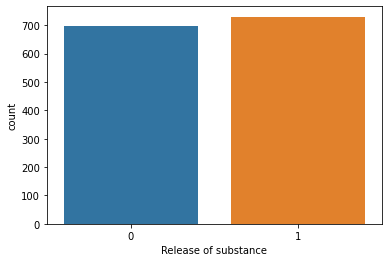

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

data = pd.read_csv("Revised data 2.csv")
# month integers to string
import calendar
data['Month of occurrence'] = data['Month of occurrence'].apply(lambda x: calendar.month_abbr[x])


data = data.set_index('Incident Number')
data = data.drop('Unnamed: 0', axis = 1)

data['Incident Types'].astype("str") 
sns.countplot(data['Release of substance'])

#one hot encoding for the categorical variables
month_one_hot = pd.get_dummies(data['Month of occurrence'])
incident_one_hot = pd.get_dummies(data['Incident Types'])
data = data.drop('Incident Types', axis = 1)
data = data.drop("Month of occurrence", axis = 1)
data = data.join(incident_one_hot)
data = data.join(month_one_hot)
data



In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score

#setting up for K-fold CV
folds = 5
X = data.drop('Release of substance', axis = 1)
y = data['Release of substance']

#stratify means that the train_test_split returns the sames class proportions in the subsets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = (1/folds), random_state = 10, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
y_train = scaler.transform(X_test)

pca = PCA(0.95)
pca.fit(X_train)

X_train = pca.transform(X_train)
y_train = pca.transform(X_test)


In [3]:
model = LogisticRegression()
model.fit(X_train, y_train)

ValueError: y should be a 1d array, got an array of shape (286, 53) instead.

In [ ]:
preds = model.predict(X_test[0].reshape(1,-1))
